In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab
import copy

In [57]:
dfO = pd.read_csv("outcomes.csv")
dfP = pd.read_csv("projects.csv")
dfD = pd.read_csv("donations.csv")

In [58]:
d = pd.merge(dfO,dfP,on="projectid",how="inner")

In [59]:
# let's create a summary of all donations (sum and count per project)
donationSummary = pd.pivot_table(dfD,index=["projectid"],
               values=["donation_total"],
               aggfunc=[np.sum,len],margins=True)
# clean up the column names for merging with main data set
donationSummary.columns =[s1 + "_" + str(s2) for (s1,s2) in donationSummary.columns.tolist()]
# merge
dd = pd.merge(d,donationSummary,left_on="projectid", right_index=True,how='inner')

In [60]:
# let's pick a few values as a sanity check and 
# compare raw donation data to summary data in new merged dataframe
#dd.head()
#dfD[dfD.projectid == 'fffeebf4827d745aa36b17c2d38d1966'].donation_total.sum()
#dfD[dfD.projectid == 'ffffac55ee02a49d1abc87ba6fc61135'].donation_total.sum()

In [62]:
# i would think that the hardest thing for a project to get is money
# that doesn't appear to be the case, with 82% of projects being fully_funded
print(sum(dd.fully_funded)/len(dd.fully_funded))

0.819589670922


In [63]:
# hardest of the 4 required criteria is a teacher referred donor
tfdTrue = len(dd.at_least_1_teacher_referred_donor[dd.at_least_1_teacher_referred_donor==1])
totalTfd = len(dd.at_least_1_teacher_referred_donor)
print(tfdTrue/totalTfd)

0.23739243717645445


In [ ]:
# replace all t/f with 1/0
for i in ['is_exciting','at_least_1_teacher_referred_donor','fully_funded','at_least_1_green_donation','great_chat','three_or_more_non_teacher_referred_donors','one_non_teacher_referred_donor_giving_100_plus','donation_from_thoughtful_donor','school_charter','school_magnet','school_year_round','school_nlns','school_kipp','school_charter_ready_promise','teacher_teach_for_america','teacher_ny_teaching_fellow','eligible_double_your_impact_match','eligible_almost_home_match']:
    dd[i] = dd[i].replace(['t','f'],[1,0])

In [7]:
# lets get a high level look at all the boolean vars 
# exciting project rate is: (var==true && proj==exciting) / (var==true)
byBoolean = pd.pivot_table(dd,index=["is_exciting"],
               values=['at_least_1_teacher_referred_donor','fully_funded','at_least_1_green_donation','great_chat','three_or_more_non_teacher_referred_donors','one_non_teacher_referred_donor_giving_100_plus','donation_from_thoughtful_donor','school_charter','school_magnet','school_year_round','school_nlns','school_kipp','school_charter_ready_promise','teacher_teach_for_america','teacher_ny_teaching_fellow','eligible_double_your_impact_match','eligible_almost_home_match'],
               aggfunc=[np.sum],margins=True)
byBoolean = byBoolean.transpose()
byBoolean["exciting_rate"] = byBoolean[1]/byBoolean.All
byBoolean.sort_values(by=('exciting_rate'),ascending=False,inplace=True)
byBoolean

is_exciting                                                0        1  \
sum at_least_1_teacher_referred_donor                87931.0  36710.0   
    great_chat                                      150398.0  36710.0   
    donation_from_thoughtful_donor                    5879.0   1057.0   
    school_kipp                                       3378.0    489.0   
    teacher_teach_for_america                        29151.0   3882.0   
    three_or_more_non_teacher_referred_donors       240718.0  31660.0   
    school_charter                                   42240.0   5074.0   
    at_least_1_green_donation                       341981.0  36710.0   
    school_charter_ready_promise                      2597.0    266.0   
    fully_funded                                    393609.0  36710.0   
    school_nlns                                       7828.0    727.0   
    one_non_teacher_referred_donor_giving_100_plus  350070.0  27695.0   
    school_magnet                                    46754.0   3371.0   
    eligible_double_your_impact_match               143042.0   9685.0   
    school_year_round                                24514.0   1614.0   
    eligible_almost_home_match                       32237.0   2061.0   
    teacher_ny_teaching_fellow                        9255.0    563.0   

is_exciting                                              All  exciting_rate  
sum at_least_1_teacher_referred_donor               124641.0       0.294526  
    great_chat                                      187108.0       0.196197  
    donation_from_thoughtful_donor                    6936.0       0.152393  
    school_kipp                                       3860.0       0.126684  
    teacher_teach_for_america                        32966.0       0.117758  
    three_or_more_non_teacher_referred_donors       272378.0       0.116236  
    school_charter                                   47288.0       0.107300  
    at_least_1_green_donation                       378691.0       0.096939  
    school_charter_ready_promise                      2861.0       0.092974  
    fully_funded                                    430075.0       0.085357  
    school_nlns                                       8540.0       0.085129  
    one_non_teacher_referred_donor_giving_100_plus  377765.0       0.073313  
    school_magnet                                    50082.0       0.067310  
    eligible_double_your_impact_match               152727.0       0.063414  
    school_year_round                                26094.0       0.061853  
    eligible_almost_home_match                       34298.0       0.060091  
    teacher_ny_teaching_fellow                        9780.0       0.057566

In [64]:
# we should look at poverty level too
# we expect a link between poverty level and success (of anything)
# not surprisingly, the link is present here 
byPovertyLevel = pd.pivot_table(dd,index=["poverty_level"],
               values=["is_exciting"],
               aggfunc=[np.sum,len],margins=True)
byPovertyLevel.columns =[s1 + "_" + str(s2) for (s1,s2) in byPovertyLevel.columns.tolist()]
byPovertyLevel
byPovertyLevel['exciting_rate'] = byPovertyLevel['sum_is_exciting']/byPovertyLevel['len_is_exciting']
byPovertyLevel.sort_values(by=('exciting_rate'),ascending=False,inplace=True)
byPovertyLevel

,sum_is_exciting,len_is_exciting,exciting_rate
poverty_level,,,
moderate poverty,5283.0,70324.0,0.075124
low poverty,947.0,13036.0,0.072645
highest poverty,21501.0,307305.0,0.069966
All,36710.0,525042.0,0.069918
high poverty,8979.0,134377.0,0.066819


In [65]:
# lets look at this by month since: 
# a) spending habits are usually cyclical (eg people spend more around the holidays)
# b) schools are not open year round 
# even if funding isn't the limiting factor in being exciting,
# ultimately all the metrics (e.g. donor referrals) boil down to raising money

## possibly actionable date here: post your projects in the summer!
## summer projects do very well (selection bias or less competition in market for school donations?) 
## january - may are weak months for both raising money and being exciting
dd['date_posted'] = pd.to_datetime(dd['date_posted'])
dd['month'] = pd.DatetimeIndex(dd['date_posted']).month
byMonth = pd.pivot_table(dd,index=["month"],
               values=["is_exciting","sum_donation_total","total_price_including_optional_support"],
               aggfunc=[np.sum,len],margins=True)
byMonth.columns =[s1 + "_" + str(s2) for (s1,s2) in byMonth.columns.tolist()]
byMonth['exciting_rate'] = byMonth['sum_is_exciting']/byMonth['len_is_exciting']
byMonth['per_project_avg_total_don']=byMonth['sum_sum_donation_total']/byMonth['len_is_exciting']
byMonth['per_project_avg_total_cost']=byMonth['sum_total_price_including_optional_support']/byMonth['len_is_exciting']
byMonth['pcnt_funded']=byMonth['per_project_avg_total_don']/byMonth['per_project_avg_total_cost']
bm = byMonth[['len_is_exciting','exciting_rate','per_project_avg_total_don','per_project_avg_total_cost','pcnt_funded']]
bm= bm.rename(columns={'len_is_exciting': 'total_projects'})
bm

,total_projects,exciting_rate,per_project_avg_total_don,per_project_avg_total_cost,pcnt_funded
month,,,,,
1,44461.0,0.054812,425.846464,563.161414,0.756171
2,38139.0,0.047248,408.418706,552.585735,0.739105
3,37386.0,0.050821,418.887073,558.841774,0.749563
4,30100.0,0.045548,431.507828,580.571513,0.743247
5,25507.0,0.055710,434.041925,581.897578,0.745908
6,22247.0,0.069717,414.353572,575.814345,0.719596
7,30342.0,0.085986,415.936242,568.090804,0.732165
8,54942.0,0.087547,432.105077,553.364527,0.780869
9,72413.0,0.077776,502.700081,632.576728,0.794686


In [27]:
# moving on...
# one particularly interesting thing i saw in boolean analysis was that 
# Teach for America (TFA) significantly outperforms New York Teaching Fellows (NYTF)
# Initially, I thought this was due to NYTF having a higher average asking price, and thus failing more
# this conflicts with my earlier assertion that being fully_funded is not a big limiting factor
# it does look like NYTF ask for more money
# but maybe there are some outliers skewing the averages? 
a1 = dd['total_price_including_optional_support'][dd['teacher_ny_teaching_fellow'] == 1].mean() 
a2 = dd['total_price_including_optional_support'][dd['teacher_teach_for_america'] == 1].mean()
print(a1,a2)

669.606827256 601.487399267


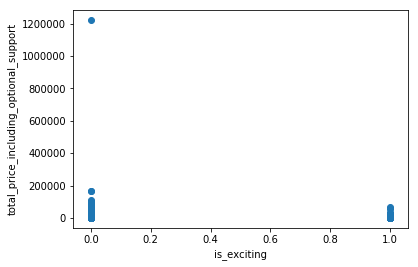

In [25]:
# let's get a general overview of how wide the range of project asking price is
# (note that this chart looks similar if you do total_price_excluding_optional_support)
x = dd.is_exciting
y = dd.total_price_including_optional_support

plt.scatter(x,y)
plt.xlabel("is_exciting")
plt.ylabel("total_price_including_optional_support")
plt.show()

In [28]:
# above graph shows a pretty wide range in asking price of failing projects.  
# let's see asking price by decile 
totalPrice = dd.total_price_including_optional_support
totalPrice.describe(percentiles=[.1,.2,.3,.4,.5,.6,.7,.8,.9])

count    5.250420e+05
mean     5.902141e+02
std      1.922414e+03
min      0.000000e+00
10%      2.060400e+02
20%      2.723600e+02
30%      3.397100e+02
40%      4.042000e+02
50%      4.719500e+02
60%      5.288900e+02
70%      5.919270e+02
80%      7.497360e+02
90%      9.810400e+02
max      1.219512e+06
Name: total_price_including_optional_support, dtype: float64

In [15]:
# bottom 90% is consistent and then the highest 10% jumps 4 levels of magnitude
# lets filter out top 10% most expensive projects
ddCopy = copy.copy(dd)
dd90 = ddCopy[dd['total_price_including_optional_support'] < 981]

In [54]:
# TFA is still far more successful than NYTF when excluding top 10% most expensive projects
aaa = dd['is_exciting'][dd['teacher_ny_teaching_fellow'] == 1].mean() 
abc = dd['is_exciting'][dd['teacher_teach_for_america'] == 1].mean()
print(aaa,abc)

0.0573436545121 0.117518844792


In [66]:
## Asking again: do NYTF ask for more money ? 
## yes, but that disparity largely disappears (and in fact reverses) when you
## exclude the top 10% most expensive projects (and possibly just a few outliers within that subset)
## NYTF is 11% more expensive for entire data set, but 3% cheaper on lower 90% of project costs
a1 = dd['total_price_including_optional_support'][dd['teacher_ny_teaching_fellow'] == 1].mean() 
a2 = dd['total_price_including_optional_support'][dd['teacher_teach_for_america'] == 1].mean()
a3 = dd90['total_price_including_optional_support'][dd90['teacher_ny_teaching_fellow'] == 1].mean()
a4 = dd90['total_price_including_optional_support'][dd90['teacher_teach_for_america'] == 1].mean()
print(a1,a2,a3,a4)

669.606827256 601.487399267 444.377328655 457.678384415


In [49]:
# and in fact, NYTF get their projects funded at a higher rate 
a5 = dd90['fully_funded'][dd90['teacher_ny_teaching_fellow'] == 1].mean()
a6 = dd90['fully_funded'][dd90['teacher_teach_for_america'] == 1].mean()
print(a5,a6)

0.93567251462 0.916061230696


In [67]:
# we know that at_least_1_teacher_referred_donor is hardest to get
# indeed, right off the bat, 84% of NYTF projects are going to fail due (in part, at least) to teach-ref-donor
a7 = dd90['at_least_1_teacher_referred_donor'][dd90['teacher_ny_teaching_fellow'] == 1].mean()
a8 = dd90['at_least_1_teacher_referred_donor'][dd90['teacher_teach_for_america'] == 1].mean()
print(a7,a8)

0.159995304613 0.282208381288


In [31]:
# TFA does significantly better on most engagement KPIs
# they have much better chats
a9 = dd90['great_chat'][dd90['teacher_ny_teaching_fellow'] == 1].mean()
a10 = dd90['great_chat'][dd90['teacher_teach_for_america'] == 1].mean()
print(a9,a10)

0.299415204678 0.40202074815


In [68]:
# TFA has more non teacher referred donors
a11 = dd90['three_or_more_non_teacher_referred_donors'][dd90['teacher_ny_teaching_fellow'] == 1].mean()
a12 = dd90['three_or_more_non_teacher_referred_donors'][dd90['teacher_teach_for_america'] == 1].mean()
print(a11,a12)

0.464021598779 0.571525286033


In [69]:
# TFA has more donations (i.e. a higher count of donations)
# (but of a smaller amount per donation since NYTF has almost the same sum of donations)
# len_donation_total = count
a13 = dd90['len_donation_total'][dd90['teacher_ny_teaching_fellow'] == 1].mean()
a14 = dd90['len_donation_total'][dd90['teacher_teach_for_america'] == 1].mean()
a22 = dd90['sum_donation_total'][dd90['teacher_ny_teaching_fellow'] == 1].mean()
a23 = dd90['sum_donation_total'][dd90['teacher_teach_for_america'] == 1].mean()
print(a13,a14,a22,a23)

4.32128654971 5.87459872267 401.440032749 408.644417261


In [70]:
# TFA has more great messages
a19 = dd90['great_messages_proportion'][dd90['teacher_ny_teaching_fellow'] == 1].mean()
a20 = dd90['great_messages_proportion'][dd90['teacher_teach_for_america'] == 1].mean()
print(a19,a20)

55.1942635932 59.199813417


In [71]:
# NYTF does better on metrics regarding the quality of their donors
# we already saw NYTF has higher dollars/donor
# NYTF has more big non teacher referred donors
a15 = dd90['one_non_teacher_referred_donor_giving_100_plus'][dd90['teacher_ny_teaching_fellow'] == 1].mean()
a16 = dd90['one_non_teacher_referred_donor_giving_100_plus'][dd90['teacher_teach_for_america'] == 1].mean()
print(a15,a16)

0.846695621552 0.778044817548


In [58]:
# NYTF has more donations from thoughtful donors 
a17 = dd90['donation_from_thoughtful_donor'][dd90['teacher_ny_teaching_fellow'] == 1].mean()
a18 = dd90['donation_from_thoughtful_donor'][dd90['teacher_teach_for_america'] == 1].mean()
print(a17,a18)

0.0257072426341 0.0108997359691
